In [1]:
pip install folium

     |████████████████████████████████| 93 kB 3.8 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [145]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Data wrangling 

In [146]:
url='https://en.wikipedia.org/wiki/Demographics_of_Auckland'
df=pd.read_html(url, header=1)[1]
df.rename(columns={"Local board area":"Neighborhood"},inplace=True)
df.head(13)

,Neighborhood,Num.,%,Num..1,%.1,Num..2,%.2,Num..3,%.3,Num..4,%.4,Num..5,%.5
0,Rodney,59013,88.9,7551,11.4,2340,3.5,3756,5.7,450,0.7,822,1.2
1,Hibiscus and Bays,84057,80.8,6735,6.5,2205,2.1,16626,16.0,1551,1.5,1206,1.2
2,Upper Harbour,34746,55.3,3210,5.1,1530,2.4,24867,39.6,1887,3.0,897,1.4
3,Kaipatiki,51633,58.5,7680,8.7,5379,6.1,29034,32.9,2718,3.1,1149,1.3
4,Devonport-Takapuna,40152,69.3,3192,5.5,1443,2.5,15249,26.3,1476,2.5,681,1.2
5,Henderson-Massey,57633,48.7,20319,17.2,24771,20.9,32523,27.5,3087,2.6,1416,1.2
6,Waitākere Ranges,38823,74.5,6621,12.7,6093,11.7,7275,14.0,936,1.8,642,1.2
7,Great Barrier,855,91.3,192,20.5,24,2.6,15,1.6,0,0.0,18,1.9
8,Waiheke,8055,88.9,1035,11.4,342,3.8,366,4.0,315,3.5,108,1.2
9,Waitemata,49950,60.3,5034,6.1,4053,4.9,26103,31.5,3912,4.7,828,1.0


In [147]:
# Drop percentage columns
df.drop(['%','%.1','%.1','%.2','%.3','%.4','%.5'], axis = 1,inplace = True) 
df.head()

,Neighborhood,Num.,Num..1,Num..2,Num..3,Num..4,Num..5
0,Rodney,59013,7551,2340,3756,450,822
1,Hibiscus and Bays,84057,6735,2205,16626,1551,1206
2,Upper Harbour,34746,3210,1530,24867,1887,897
3,Kaipatiki,51633,7680,5379,29034,2718,1149
4,Devonport-Takapuna,40152,3192,1443,15249,1476,681


In [148]:
# Add population column & drop Num's columns
df['Population']= df.sum(axis=1)
df.drop(['Num.','Num..1','Num..2','Num..3','Num..4','Num..5'], axis = 1,inplace = True) 
df.head(16)

,Neighborhood,Population
0,Rodney,73932
1,Hibiscus and Bays,112380
2,Upper Harbour,67137
3,Kaipatiki,97593
4,Devonport-Takapuna,62193
5,Henderson-Massey,139749
6,Waitākere Ranges,60390
7,Great Barrier,1104
8,Waiheke,10221
9,Waitemata,89880


In [149]:
# Add Latitude and Longitude to dataframe
columns = ['Neighborhood','Population'] 

df_merge = pd.DataFrame(columns=columns)

neighborhood = df['Neighborhood']
population=df['Population']

location = None
latitude = None
longitude = None

for data in range(0, len(neighborhood)):
    nei = neighborhood[data]
    pop=population[data]
    geolocator = Nominatim(user_agent="user-agent='my_email@myserver.com")
    location = geolocator.geocode('{}'.format(nei))
    latitude = location.latitude
    longitude = location.longitude
    
    df_merge = df_merge.append({ 'Neighborhood':nei,'Population':pop,'Latitude': location.latitude,'Longitude': location.longitude}, ignore_index=True)
    
df_akl=df_merge
df_akl

,Neighborhood,Population,Latitude,Longitude
0,Rodney,73932,42.205546,-95.952511
1,Hibiscus and Bays,112380,-36.646629,174.783579
2,Upper Harbour,67137,-36.764037,174.675784
3,Kaipatiki,97593,-36.794515,174.716734
4,Devonport-Takapuna,62193,-36.791967,174.787492
5,Henderson-Massey,139749,-36.848997,174.629905
6,Waitākere Ranges,60390,-36.982943,174.449241
7,Great Barrier,1104,-1.696481,29.245338
8,Waiheke,10221,-36.793097,175.088401
9,Waitemata,89880,-36.821227,174.669807


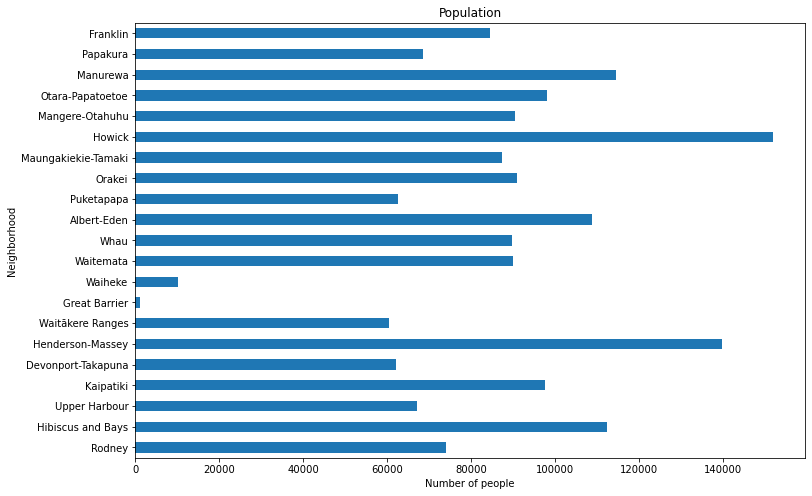

In [19]:
# visualize pipulation in auckland neighborhoods
import matplotlib.pyplot as plt
import numpy as np

#print(df.iloc[5][1])

df[['Neighborhood', 'Population']].plot(kind='barh', figsize=(12, 8), legend = None)

plt.xlabel('Number of people') # add to x-label to the plot
plt.ylabel('Neighborhood') # add y-label to the plot
plt.title('Population') # add title to the plot
plt.yticks (np.arange(21), df_akl['Neighborhood'])
plt.show()





### Create a map of Auckland with neighborhoods superimposed on top

In [11]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [150]:
import folium
#geographical coordinates of Auckland
address = 'Auckland, New Zealand'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Auckland, New Zealand {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Auckland, New Zealand -36.852095, 174.7631803.


In [151]:
# create map of Auckland using latitude and longitude values
map_Auckland = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df_akl['Latitude'], df_akl['Longitude'], df_akl['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Auckland)  
    
map_Auckland

In [152]:
#Define Foursquare Credentials and Version
CLIENT_ID = 'PG0TOS2YWVNT53NPNA5JLVJIWW2QPRHICR0PDHVBIZSOAPBW' # your Foursquare ID
CLIENT_SECRET = '5OGWRTEEXWK4LTECTDTIC3YI0XTGGO3QLLURDHO5TX5GN0XV' # your Foursquare Secret
ACCESS_TOKEN = 'KXFKZWETUD4CBOXPJOQP35RVDICCHOZEKYAGZFTVMUXWROIB'
VERSION='20201203'# Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
radius = 2000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PG0TOS2YWVNT53NPNA5JLVJIWW2QPRHICR0PDHVBIZSOAPBW
CLIENT_SECRET:5OGWRTEEXWK4LTECTDTIC3YI0XTGGO3QLLURDHO5TX5GN0XV




### let's get the top 100 venues that are within a radius of 2000 meters.

In [153]:
venues = []

for lat, long, neighborhood in zip(df_akl['Latitude'], df_akl['Longitude'], df_akl['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [154]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(525, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Rodney,42.205546,-95.952511,United States Postal Service,42.203652,-95.950499,Post Office
1,Rodney,42.205546,-95.952511,Hamann Trucking,42.200090,-95.966940,Moving Target
2,Upper Harbour,-36.764037,174.675784,Malthouse,-36.775521,174.670324,Pub
3,Upper Harbour,-36.764037,174.675784,Wainoni Park,-36.771903,174.675557,Park
4,Upper Harbour,-36.764037,174.675784,Palette,-36.774340,174.671142,Café


In [155]:
#Let's check how many venues were returned for each neighorhood

venues_df.groupby(["Neighborhood"]).count()


,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
Albert-Eden,100,100,100,100,100,100
Devonport-Takapuna,64,64,64,64,64,64
Franklin,15,15,15,15,15,15
Great Barrier,5,5,5,5,5,5
Henderson-Massey,32,32,32,32,32,32
Howick,2,2,2,2,2,2
Kaipatiki,33,33,33,33,33,33
Mangere-Otahuhu,13,13,13,13,13,13
Manurewa,9,9,9,9,9,9


In [156]:
#Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 139 uniques categories.


In [157]:
# print out the list of categories
venues_df['VenueCategory'].unique()[:50]

array(['Post Office', 'Moving Target', 'Pub', 'Park', 'Café',
       'Convenience Store', 'Liquor Store', 'Golf Course', 'Burger Joint',
       'Gym', 'Night Market', 'Fast Food Restaurant', 'Gastropub',
       'Supermarket', 'Shopping Mall', 'Pizza Place', 'Department Store',
       'Ramen Restaurant', 'Bus Stop', 'Indian Restaurant', 'Hotel',
       'Pet Store', 'Gymnastics Gym', 'Grocery Store', 'Soccer Field',
       'Portuguese Restaurant', 'Beach', 'Ice Cream Shop', 'Restaurant',
       'Mexican Restaurant', 'Vietnamese Restaurant',
       'Frozen Yogurt Shop', 'Malay Restaurant', 'Japanese Restaurant',
       'Music Venue', 'Mediterranean Restaurant', 'Farmers Market', 'Bar',
       'Thai Restaurant', 'Colombian Restaurant', 'Boutique',
       'Italian Restaurant', 'Coffee Shop', 'Movie Theater',
       'Middle Eastern Restaurant', 'French Restaurant', 'Salad Place',
       'Sandwich Place', 'Chinese Restaurant', 'Bistro'], dtype=object)

In [158]:
# check if the results contain "Shopping Mall"
"Neighborhood" in venues_df['VenueCategory'].unique()

True



## Analyze Each Neighborhood


In [159]:
# one hot encoding
kl_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kl_onehot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [kl_onehot.columns[-1]] + list(kl_onehot.columns[:-1])
kl_onehot = kl_onehot[fixed_columns]

print(kl_onehot.shape)
kl_onehot.head()

(525, 140)


,Neighborhoods,Airport,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,Bar,Baseball Field,Basketball Stadium,Beach,Beer Garden,Big Box Store,Bistro,Boat or Ferry,Bookstore,Border Crossing,Boutique,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Café,Campground,Chinese Restaurant,Climbing Gym,Clothing Store,Coffee Shop,Colombian Restaurant,Comfort Food Restaurant,Convenience Store,Dance Studio,Deli / Bodega,Department Store,Diner,Dog Run,Donut Shop,Electronics Store,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Heliport,History Museum,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Korean BBQ Restaurant,Lake,Lingerie Store,Liquor Store,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Mongolian Restaurant,Movie Theater,Moving Target,Multiplex,Music Venue,Neighborhood,Night Market,Organic Grocery,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pizza Place,Playground,Pool,Portuguese Restaurant,Post Office,Pub,Ramen Restaurant,Rental Car Location,Restaurant,Salad Place,Sandwich Place,Scenic Lookout,Shoe Store,Shopping Mall,Skate Park,Soccer Field,Soccer Stadium,Stadium,Stationery Store,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Trail,Train Station,Truck Stop,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Vineyard,Winery,Women's Store,Zoo
0,Rodney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Rodney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Upper Harbour,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Upper Harbour,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Upper Harbour,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0





### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [160]:
kl_grouped = kl_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(kl_grouped.shape)
kl_grouped

(19, 140)


,Neighborhoods,Airport,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,Bar,Baseball Field,Basketball Stadium,Beach,Beer Garden,Big Box Store,Bistro,Boat or Ferry,Bookstore,Border Crossing,Boutique,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Café,Campground,Chinese Restaurant,Climbing Gym,Clothing Store,Coffee Shop,Colombian Restaurant,Comfort Food Restaurant,Convenience Store,Dance Studio,Deli / Bodega,Department Store,Diner,Dog Run,Donut Shop,Electronics Store,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Heliport,History Museum,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Korean BBQ Restaurant,Lake,Lingerie Store,Liquor Store,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Mongolian Restaurant,Movie Theater,Moving Target,Multiplex,Music Venue,Neighborhood,Night Market,Organic Grocery,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pizza Place,Playground,Pool,Portuguese Restaurant,Post Office,Pub,Ramen Restaurant,Rental Car Location,Restaurant,Salad Place,Sandwich Place,Scenic Lookout,Shoe Store,Shopping Mall,Skate Park,Soccer Field,Soccer Stadium,Stadium,Stationery Store,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Trail,Train Station,Truck Stop,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Vineyard,Winery,Women's Store,Zoo
0,Albert-Eden,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.060000,0.080000,0.01,0.000000,0.000000,0.01,0.00000,0.010000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.030000,0.0000,0.010000,0.200000,0.000000,0.030000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.01,0.010000,0.020000,0.0,0.000000,0.01000,0.010000,0.000000,0.0,0.000000,0.020000,0.000000,0.010000,0.000000,0.010000,0.010000,0.01000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02000,0.000000,0.010000,0.020000,0.030000,0.010000,0.000000,0.000000,0.000000,0.02,0.000000,0.000000,0.000000,0.000000,0.01,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.00000,0.000000,0.000000,0.0,0.010000,0.000000,0.000000,0.000000,0.01,0.000000,0.040000,0.000000,0.000000,0.030000,0.01,0.01,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.010000,0.000000,0.000000,0.01,0.02000,0.01,0.000000,0.010000,0.000000,0.010000,0.01,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.01,0.000000,0.010000,0.000000,0.000000,0.000000,0.01
1,Devonport-Takapuna,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.031250,0.00,0.000000,0.031250,0.00,0.00000,0.015625,0.0,0.000000,0.0,0.015625,0.000000,0.000000,0.031250,0.0000,0.000000,0.187500,0.000000,0.015625,0.000000,0.000000,0.015625,0.015625,0.000000,0.000000,0.00,0.015625,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.015625,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.015625,0.000000,0.015625,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.015625,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.031250,0.000000,0.00,0.046875,0.062500,0.000000,0.015625,0.015625,0.000000,0.015625,0.031250,0.000000,0.015625,0.015625,0.015625,0.00000,0.000000,0.015625,0.0,0.000000,0.015625,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.031250,0.00,0.00,0.015625,0.0,0.015625,0.000000,0.000000,0.0468

In [161]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [56]:
#Showing the most common venues for each Neighborhood


num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighborhood'] = kl_grouped['Neighborhood']

for ind in np.arange(kl_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(kl_grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0.0,Café,Bar,Bakery,Park,Chinese Restaurant,Pizza Place,Burger Joint,Gym,History Museum,Coffee Shop
1,0.0,Café,Japanese Restaurant,Restaurant,Italian Restaurant,Bar,Malay Restaurant,Burger Joint,Fast Food Restaurant,Ice Cream Shop,Beach
2,0.0,Fast Food Restaurant,American Restaurant,Convenience Store,Taco Place,Mexican Restaurant,Ice Cream Shop,BBQ Joint,Grocery Store,Truck Stop,Fried Chicken Joint
3,0.0,Hotel,Border Crossing,Bistro,Café,Lake,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Electronics Store
4,0.0,Café,Fast Food Restaurant,Asian Restaurant,Convenience Store,Supermarket,Park,Burger Joint,Chinese Restaurant,Coffee Shop,Pet Store


In [162]:
akl_mall = venues_df[(venues_df['VenueCategory'].str.contains('Mall', regex=False)) |
                 (venues_df['VenueCategory'].str.contains('Bar', regex=False)) ].groupby(['Neighborhood']).count()
akl_mall.drop(['Latitude', 'Longitude', 'VenueLongitude', 'VenueName', 'VenueLatitude'], axis = 1, inplace = True)
akl_mall.rename(columns = {'VenueCategory':'Number of malls'}, inplace=True)
akl_mall.head()


,Number of malls
Neighborhood,
Albert-Eden,9
Devonport-Takapuna,2
Henderson-Massey,1
Kaipatiki,1
Maungakiekie-Tamaki,3


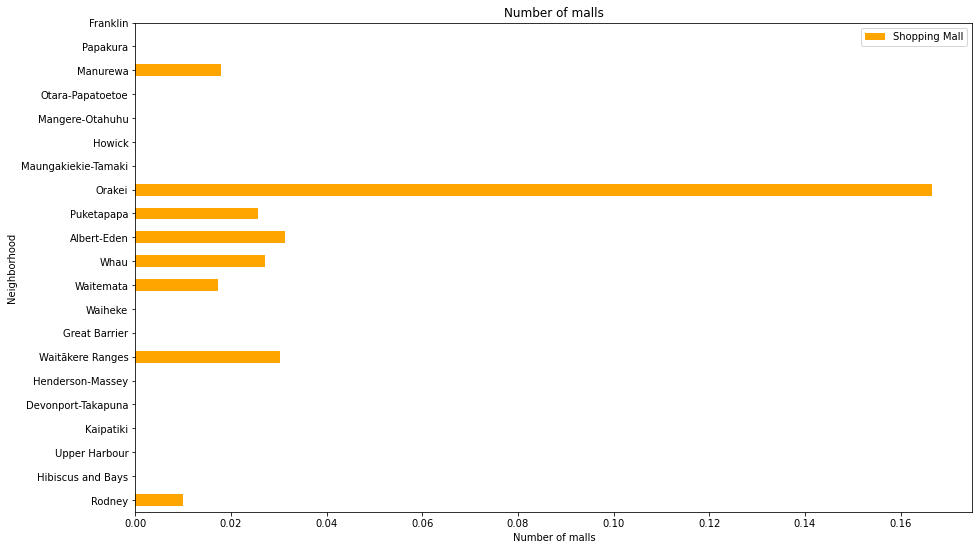

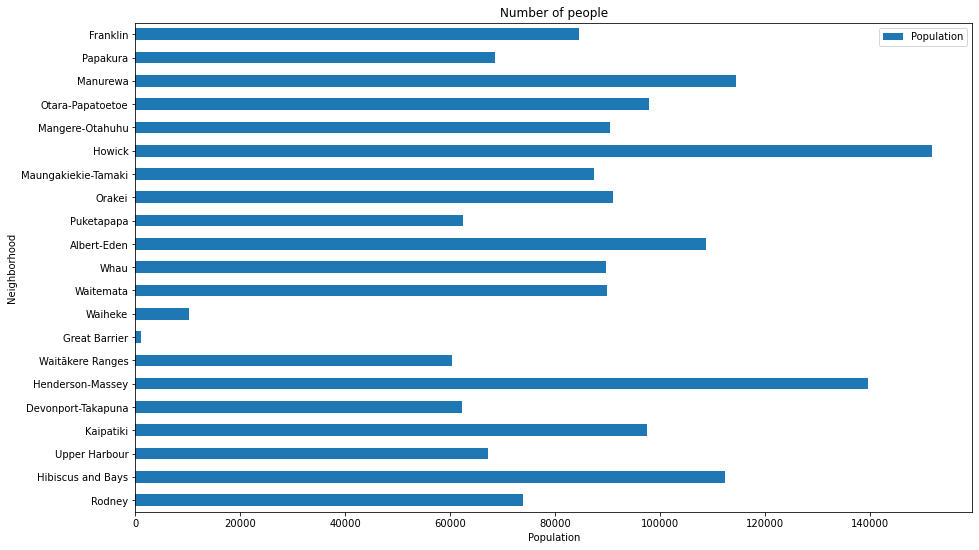

In [163]:
# compare population and number of malls in Neighborhoods
kl_grouped[['Shopping Mall']].plot(kind='barh', figsize=(15,9), color='orange')

plt.ylabel('Neighborhood') # add y-label to the plot
plt.xlabel('Number of malls')
plt.title('Number of malls') # add title to the plot
plt.yticks (np.arange(21), df_akl['Neighborhood'])

# Subplot 2: Line plot
df[['Neighborhood', 'Population']].plot(kind='barh', figsize=(15,9))

plt.ylabel('Neighborhood') # add y-label to the plot
plt.xlabel('Population') # add title to the plot
plt.title('Number of people') # add to x-label to the plot

plt.yticks (np.arange(21), df_akl['Neighborhood'])


plt.show()


In [164]:
len(kl_grouped[kl_grouped["Shopping Mall"] > 0])


8




### Create a new DataFrame for Shopping Mall data only

In [165]:
kl_mall = kl_grouped[["Neighborhoods","Shopping Mall"]]


In [166]:
kl_mall.head()


,Neighborhoods,Shopping Mall
0,Albert-Eden,0.01
1,Devonport-Takapuna,0.00
2,Franklin,0.00
3,Great Barrier,0.00
4,Henderson-Massey,0.00





## Clustering Neighborhoods



#### Run _k_-means to cluster the neighborhood into 3 clusters.

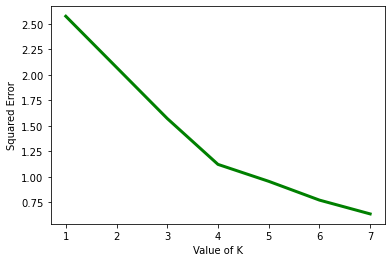

In [167]:
#Elbow method is used for identifying the best number of cluster
AKK = kl_grouped.drop(['Neighborhoods'], axis=1)
cost =[] 
for i in range(1, 8): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(AKK) 
    cost.append(KM.inertia_)      
  
plt.plot(range(1, 8), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Squared Error") 
plt.show()

#### SO, the best number for clusters is 4!  

In [168]:
# set number of clusters
kclusters = 4

kl_clustering = kl_mall.drop(["Neighborhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kl_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 2, 2, 2, 2, 2, 0, 2, 2, 3], dtype=int32)

In [169]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
kl_merged = kl_mall.copy()

# add clustering labels
kl_merged["Cluster Labels"] = kmeans.labels_

In [170]:
kl_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
kl_merged.head()

,Neighborhood,Shopping Mall,Cluster Labels
0,Albert-Eden,0.01,3
1,Devonport-Takapuna,0.00,2
2,Franklin,0.00,2
3,Great Barrier,0.00,2
4,Henderson-Massey,0.00,2


In [171]:
# merge kl_merged with df_akl to add latitude/longitude for each neighborhood
kl_merged = kl_merged.join(df_akl.set_index("Neighborhood"), on="Neighborhood",how='inner')

print(kl_merged.shape)
kl_merged.head() # check the last columns!

(19, 6)


,Neighborhood,Shopping Mall,Cluster Labels,Population,Latitude,Longitude
0,Albert-Eden,0.01,3,108819,-36.870200,174.731366
1,Devonport-Takapuna,0.00,2,62193,-36.791967,174.787492
2,Franklin,0.00,2,84504,33.160119,-95.216521
3,Great Barrier,0.00,2,1104,-1.696481,29.245338
4,Henderson-Massey,0.00,2,139749,-36.848997,174.629905


In [142]:
# sort the results by Cluster Labels
print(kl_merged.shape)
kl_merged.sort_values(["Cluster Labels"], inplace=True)
kl_merged

(19, 6)


,Neighborhood,Shopping Mall,Cluster Labels,Population,Latitude,Longitude
12,Papakura,0.025641,0,68496,-37.059960,174.944542
11,Otara-Papatoetoe,0.031250,0,97992,-36.992209,174.859371
10,Orakei,0.027027,0,90960,-36.870288,174.814415
6,Kaipatiki,0.030303,0,97593,-36.794515,174.716734
13,Puketapapa,0.166667,1,62532,-36.942041,174.723668
8,Manurewa,0.000000,2,114447,-37.024150,174.888660
14,Rodney,0.000000,2,73932,42.205546,-95.952511
17,Waitemata,0.000000,2,89880,-36.821227,174.669807
16,Waiheke,0.000000,2,10221,-36.793097,175.088401
7,Mangere-Otahuhu,0.000000,2,90387,-36.983504,174.761372






### Finally, let's visualize the resulting clusters

In [172]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kl_merged['Latitude'], kl_merged['Longitude'], kl_merged['Neighborhood'], kl_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters






## Examine Clusters

In [173]:
#Cluster 0
kl_merged.loc[kl_merged['Cluster Labels'] == 0]

,Neighborhood,Shopping Mall,Cluster Labels,Population,Latitude,Longitude
6,Kaipatiki,0.030303,0,97593,-36.794515,174.716734
10,Orakei,0.027027,0,90960,-36.870288,174.814415
11,Otara-Papatoetoe,0.031250,0,97992,-36.992209,174.859371
12,Papakura,0.025641,0,68496,-37.059960,174.944542


In [174]:
#Cluster 1
kl_merged.loc[kl_merged['Cluster Labels'] == 1]

,Neighborhood,Shopping Mall,Cluster Labels,Population,Latitude,Longitude
13,Puketapapa,0.166667,1,62532,-36.942041,174.723668


In [175]:
#Cluster 2
kl_merged.loc[kl_merged['Cluster Labels'] == 2]

,Neighborhood,Shopping Mall,Cluster Labels,Population,Latitude,Longitude
1,Devonport-Takapuna,0.0,2,62193,-36.791967,174.787492
2,Franklin,0.0,2,84504,33.160119,-95.216521
3,Great Barrier,0.0,2,1104,-1.696481,29.245338
4,Henderson-Massey,0.0,2,139749,-36.848997,174.629905
5,Howick,0.0,2,151947,45.184903,-73.849060
7,Mangere-Otahuhu,0.0,2,90387,-36.983504,174.761372
8,Manurewa,0.0,2,114447,-37.024150,174.888660
14,Rodney,0.0,2,73932,42.205546,-95.952511
15,Upper Harbour,0.0,2,67137,-36.764037,174.675784
16,Waiheke,0.0,2,10221,-36.793097,175.088401


In [176]:
#Cluster 3
kl_merged.loc[kl_merged['Cluster Labels'] == 3]

,Neighborhood,Shopping Mall,Cluster Labels,Population,Latitude,Longitude
0,Albert-Eden,0.010000,3,108819,-36.870200,174.731366
9,Maungakiekie-Tamaki,0.017241,3,87396,-36.902262,174.845038
18,Whau,0.017857,3,89727,-36.907050,174.692776
